# Case Studi: Data Profiling

Tugas:
<br>
1. Import dataset csv ke variable bernama uncleaned_raw
2. Inspeksi dataframe uncleaned_raw
3. Cek kolom yang mengandung missing value, jika ada, kolom apakah itu dan berapa persen missing value pada kolom tersebut?
4. Mengisi missing value tersebut dengan mean dari kolom tersebut!
5. Mengetahui kolom yang memiliki outliers! Gunakan visualisasi dengan boxplot pada dataframe uncleaned_raw.
6. Melakukan proses removing outliers pada kolom UnitPrice.
7. Checking duplikasi and melakukan deduplikasi dataset tersebut!

#### <font color = Red> Import Library yang Dibutuhkan </font>

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

#### <font color = blue>1. Import dataset csv ke variable bernama uncleaned_raw
#### <font color = blue>2. Inspeksi dataframe uncleaned_raw </font>

In [74]:
# Baca dataset uncleaned_raw.csv
uncleaned_raw = pd.read_csv('D:\Learning\Python\Practice\Belajar Python\Data Quality with Python for Beginner\Dataset\Dataset.csv')

#inspeksi dataframe uncleaned_raw
print('Lima data teratas:') 
print(uncleaned_raw.head(5))

Lima data teratas:
   InvoiceNo                          Description  Quantity     InvoiceDate  \
0     536365   WHITE HANGING HEART T-LIGHT HOLDER       6.0  12/01/10 08.26   
1     536366                  WHITE METAL LANTERN       6.0  12/01/10 08.26   
2     536367       CREAM CUPID HEARTS COAT HANGER       8.0  12/01/10 08.26   
3     536368  KNITTED UNION FLAG HOT WATER BOTTLE       6.0  12/01/10 08.26   
4     536369       RED WOOLLY HOTTIE WHITE HEART.       6.0  12/01/10 08.26   

   UnitPrice  CustomerID      City  
0      29000       17850  Surabaya  
1      41000       17850  Surabaya  
2      18000       17850  Surabaya  
3      38000       17850   Jakarta  
4      27000       17850     Medan  


#### <font color = blue>3. Cek kolom yang mengandung missing value,dan cek berapa persen missing valuenya.</font>

In [63]:
#Check kolom yang mengandung missing value
print('\nKolom dengan missing value:') 
print(uncleaned_raw.isnull().any())


Kolom dengan missing value:
InvoiceNo      False
Description    False
Quantity        True
InvoiceDate    False
UnitPrice      False
CustomerID     False
City           False
dtype: bool


In [64]:
#Persentase missing value
length_qty = len(uncleaned_raw['Quantity'])
count_qty = uncleaned_raw['Quantity'].count()
#mengurangi length dengan count
number_of_missing_values_qty = length_qty - count_qty
#mengubah ke bentuk float
float_of_missing_values_qty = float(number_of_missing_values_qty / length_qty)
#mengubah ke dalam bentuk persen
pct_of_missing_values_qty = '{0:.1f}%'.format(float_of_missing_values_qty *100) 

In [75]:
#print hasil percent dari missing value
print('Persentase missing value kolom Quantity:', pct_of_missing_values_qty)

Persentase missing value kolom Quantity: 4.0%


#### <font color = blue>4. Mengisi missing value tersebut dengan mean dari kolom tersebut!</font>

In [76]:
#Mengisi missing value tersebut dengan mean dari kolom tersebut
uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean)
print(uncleaned_raw['Quantity'].isnull().any())

False


#### <font color = blue> 5. Mengetahui kolom yang memiliki outliers! Gunakan visualisasi dengan boxplot pada dataframe uncleaned_raw.</font>

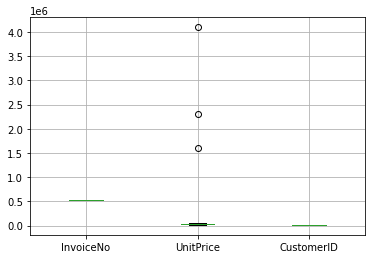

In [77]:
#Mengetahui kolom yang memiliki outliers!
uncleaned_raw.boxplot()
plt.show()

#### 6. Melakukan proses removing outliers pada kolom UnitPrice.

In [78]:
#Check IQR
Q1 = uncleaned_raw['UnitPrice'].quantile(0.25)
Q3 = uncleaned_raw['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

#removing outliers
uncleaned_raw = uncleaned_raw[~((uncleaned_raw['UnitPrice'] < (Q1 - 1.5 * IQR)) | (uncleaned_raw['UnitPrice'] > (Q3 + 1.5 * IQR)))]

#### <font color = blue> 7. Checking duplikasi and melakukan deduplikasi dataset tersebut! </font>

In [71]:
#check for duplication
print(uncleaned_raw.duplicated(subset=None))
print('Jumlah Data Sebelum Penghapusan Data Duplikat =', uncleaned_raw.shape)

0      False
1      False
2      False
3      False
4      False
       ...  
500     True
501     True
502     True
503     True
504     True
Length: 502, dtype: bool
Jumlah Data Sebelum Penghapusan Data Duplikat = (502, 7)


In [72]:
#remove duplication
uncleaned_raw = uncleaned_raw.drop_duplicates()
print('Jumlah Data Setelah Penghapusan Data Duplikat =', uncleaned_raw.shape)

Jumlah Data Setelah Penghapusan Data Duplikat = (496, 7)
